# 資料分析

- 學經濟學主要是要分析現實

- 理解現實的第一步是要對於資料有基礎了解

- Python 目前最強大的 Package 

    -```Pandas```: 處理資料
    
    -```pandas-datareader```: 抓取資料

# Data Reader

- 當我們下載原始資料需要經過處理，不是很方便

- 如果下載下來的資料可以直接進行分析與處理，可以省去很多時間

- ```pandas-datareader``` 便是為了這目的產生的套件

- 透過 ```pandas-datareader``` 抓取的資料便是 pandas 格式的資料，稱作 dataframe

- 只是 Pandas 在 Anaconda 預設有安裝，然而 ```pandas-datareader``` 沒有

# 安裝方式: pandas-datareader

- 這套件非 Anaconda 預設安裝，我們需要手動安裝

- 開啟 anaconda prompt 

- 輸入 ``` conda install -c anaconda pandas-datareader  ```

- 關於這 Package 可以抓取的資料，請見 https://pydata.github.io/pandas-datareader/devel/remote_data.html

---

# FRED

- 美國 FED 提供的資料庫

- 原則上美國總體相關資料都可以在這邊找到

In [2]:
import pandas_datareader.data as web

In [3]:
gdp = web.DataReader('GDP', 'fred', '2000-01-01', '2017-12-31')

In [4]:
type(gdp)

pandas.core.frame.DataFrame

# Pandas 

- 抓資料下來後，我們可能會想要知道資料的基本情況

- 我們以美國 GDP 跟失業率為例子

- head, plot, describe

In [5]:
gdp.head()

,GDP
DATE,
2000-01-01,10002.857
2000-04-01,10247.679
2000-07-01,10319.825
2000-10-01,10439.025
2001-01-01,10472.879


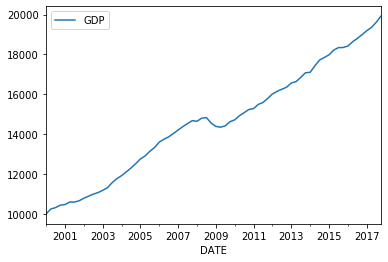

In [6]:
gdp.plot()

In [7]:
gdp.describe()

,GDP
count,72.000000
mean,14633.913306
std,2798.005067
min,10002.857000
25%,12254.751750
50%,14639.530000
75%,16690.631500
max,19918.910000


# 美國失業率

In [8]:
unemp = web.DataReader('UNRATE', 'fred', '2000-01-01', '2017-12-31')

In [9]:
unemp.head()

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


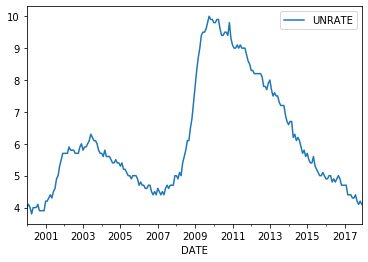

In [10]:
unemp.plot()

In [11]:
unemp.describe()

,UNRATE
count,216.000000
mean,6.113889
std,1.758671
min,3.800000
25%,4.700000
50%,5.600000
75%,7.350000
max,10.000000


# 失業率的頻率是 Monthly

- 如何轉換資料頻率

- resample

In [48]:
unemp2 = web.DataReader('UNRATE', 'fred', '2000-04-01', '2000-06-01')
unemp2.head()

,UNRATE
DATE,
2000-04-01,3.8
2000-05-01,4.0
2000-06-01,4.0


In [49]:
unempQ = unemp2.resample('QS').mean()

In [50]:
unempQ.head()

,UNRATE
DATE,
2000-04-01,3.933333


In [51]:
unempQ = unemp2.resample('Q').mean()

In [52]:
unempQ.head()

,UNRATE
DATE,
2000-06-30,3.933333


In [53]:
unempQ = unemp2.resample('QS').first()

In [54]:
unempQ.head()

,UNRATE
DATE,
2000-04-01,3.8


In [55]:
unempQ = unemp2.resample('QS').last()

In [56]:
unempQ.head()

,UNRATE
DATE,
2000-04-01,4.0


# 合併資料

- concat

In [16]:
gdp.head()

,GDP
DATE,
2000-01-01,10002.857
2000-04-01,10247.679
2000-07-01,10319.825
2000-10-01,10439.025
2001-01-01,10472.879


In [21]:
gdp1 = web.DataReader('GDP', 'fred', '1980-01-01', '1999-12-31')

In [22]:
gdp1.head()

,GDP
DATE,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206


In [23]:
import pandas as pd
gdp_combine = pd.concat([gdp1, gdp], axis = 0)

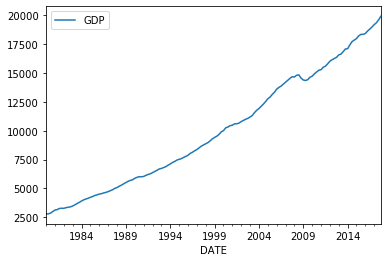

In [24]:
gdp_combine.plot()

In [17]:
unemp.head()

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [26]:
import pandas as pd
pd.concat([gdp, unemp], axis = 1)

,GDP,UNRATE
DATE,,
2000-01-01,10002.857,4.0
2000-02-01,NaN,4.1
2000-03-01,NaN,4.0
2000-04-01,10247.679,3.8
2000-05-01,NaN,4.0
...,...,...
2017-08-01,NaN,4.4
2017-09-01,NaN,4.2
2017-10-01,19918.910,4.1


In [27]:
df = pd.concat([gdp, unemp], axis = 1)

In [28]:
df.head()

,GDP,UNRATE
DATE,,
2000-01-01,10002.857,4.0
2000-02-01,NaN,4.1
2000-03-01,NaN,4.0
2000-04-01,10247.679,3.8
2000-05-01,NaN,4.0


## 如果是同一個資料庫

- pandas_datareader 可以直接抓取，幫你合併好

- 所以省去不少麻煩

In [29]:
data = web.DataReader(['UNRATE', 'GDP'], 'fred', '2000-01-01', '2017-01-01')

In [30]:
data.head()

,UNRATE,GDP
DATE,,
2000-01-01,4.0,10002.857
2000-02-01,4.1,NaN
2000-03-01,4.0,NaN
2000-04-01,3.8,10247.679
2000-05-01,4.0,NaN


# 儲存資料

- to_excel: xls file

- to_csv: csv file

- to_stata: dta file

- 還有許多格式

In [31]:
data.to_excel('data.xls', sheet_name='FRED')